In [1]:
import pandas as pd
import numpy as np
import pyreadr

In [4]:
year = 89
df1 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base1\base{year}")
df2 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base2\HHP1_{year}")
df3 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base3\P2_{year}")
df4 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Food_{year}")
df5 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Cigar_{year}")
df6 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\NonCatDrinks_{year}")
df7 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Cloth_{year}")
df8 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Invest_{year}")
df9 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Part3_{year}")
df10 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section04_{year}")
df11 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section13_{year}")
dataframes = []
dataframes.extend([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])
for i in range(len(dataframes)):
    df = dataframes[i]
    print(df.columns)
    print(df.shape)
    

Index(['HHID', 'month', 'head_job', 'household_type', 'region', 'quarter',
       'weight', 'county_code', 'province_code', 'county89', 'province'],
      dtype='object')
(38950, 11)
Index(['HHID', 'HHsize', 'AveAge', 'NumChild_U5', 'NumChild_B5_7',
       'NumChild_B7_18', 'NumChildOver18', 'HeadWoman', 'Dep_Student',
       'Num_Literate', 'NumSpouse', 'NumEmployed', 'NumOld', 'NumMale',
       'NumNotfirstR'],
      dtype='object')
(38285, 15)
Index(['HHID', 'Tenure', 'Othertenure', 'Room', 'Area', 'Skeleton',
       'MainMaterial', 'PrivateVehicle', 'Motorcycle', 'Bike', 'Radio',
       'Cassette', 'TVbw', 'TV', 'VideoPlayer', 'Computer', 'Cellphone',
       'Freezer', 'Refrigerator', 'Freez_refrig', 'Oven', 'Vacuum', 'Washer',
       'Sewing', 'Fan', 'Cooler_water_portable', 'Cooler_gas_portable',
       'Dishwasher', 'None', 'Pipewater', 'Electricity', 'Pipegas', 'Phone',
       'Internet', 'Bathroom', 'Kitchen', 'Cooler_water', 'Centralcooler',
       'Centralheat', 'Pakage', 'C

In [9]:
years = list(range(89, 99))+ [99] + list(range(1400, 1404))
df12 = pd.DataFrame()
for year in years:
    dataframes = []
    df1 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base1\base{year}")
    df2 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base2\HHP1_{year}")
    df3 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\base3\P2_{year}")
    df4 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Food_{year}")
    df5 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\Cigar_{year}")
    df6 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\food\NonCatDrinks_{year}")
    df7 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Cloth_{year}")
    df8 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Invest_{year}")
    df9 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\Part3_{year}")
    df10 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section04_{year}")
    df11 = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\sectors\section13_{year}")
    
    dataframes.extend([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11])
    merged_df = dataframes[0]
    for i in range(1, len(dataframes)):
        merged_df = merged_df.merge(dataframes[i], on='HHID', how='left')
    
    merged_df["year"] = year
    print(merged_df.shape[0])
    
    pd.to_pickle(merged_df, f"Merged_{year}")
    
    metadata = pd.DataFrame({
    "col" : list(merged_df.columns),
    f"missed{year}" : merged_df.isna().sum(),
    })
    
    if year == 89:
        df13 = metadata.reset_index(drop=True)
    else:
        df13 = pd.merge(df13, metadata, on="col", how="left")

    

38950
40011
40007
39864
39856
39857
39864
37962
38960
38328
37557
37988
37951
37883
37505


In [11]:
pd.to_pickle(df13, "meta_data")

In [13]:
meta_data = pd.read_pickle("meta_data")
meta = meta_data.set_index(meta_data["col"]).transpose()
meta = meta.iloc[1:,:]
meta

col,HHID,month,head_job,household_type,region,quarter,weight,county_code,province_code,county89,...,ClothesExtraExp,HousingMaintainExp,FurniExtraExp,MedicalExtraExp,TransportationExtraExp,CommunicationExtraExp,AmusementExtraExp,EducationExp,OtherExtraExp,year
missed89,0,0,0,0,0,0,38950,665,0,665,...,0,0,0,0,0,0,0,0,0,0
missed90,0,1,4,0,0,0,40011,1498,0,1498,...,0,0,0,0,0,0,0,0,0,0
missed91,0.0,0.0,0.0,0.0,0.0,0.0,40007.0,1815.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missed92,0.0,12.0,1549.0,0.0,0.0,0.0,39864.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missed93,0.0,0.0,0.0,0.0,0.0,0.0,39856.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missed94,0.0,0.0,0.0,0.0,0.0,0.0,39857.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missed95,0.0,0.0,0.0,0.0,0.0,0.0,39864.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missed96,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missed97,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
missed98,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
list_cols = []
for col in meta.columns:
    if meta[col].isna().sum() == 0:
        list_cols.append(col)

print(list_cols)

['HHID', 'month', 'household_type', 'region', 'quarter', 'weight', 'county_code', 'province_code', 'province', 'HHsize', 'AveAge', 'NumChild_U5', 'NumChild_B5_7', 'NumChild_B7_18', 'NumChildOver18', 'HeadWoman', 'Dep_Student', 'Num_Literate', 'NumSpouse', 'NumEmployed', 'NumOld', 'NumMale', 'NumNotfirstR', 'Tenure', 'Room', 'Area', 'Skeleton', 'MainMaterial', 'PrivateVehicle', 'Motorcycle', 'Bike', 'Radio', 'Cassette', 'TVbw', 'TV', 'VideoPlayer', 'Computer', 'Cellphone', 'Freezer', 'Refrigerator', 'Freez_refrig', 'Vacuum', 'Washer', 'Sewing', 'Fan', 'Cooler_water_portable', 'Cooler_gas_portable', 'Dishwasher', 'None', 'Pipewater', 'Electricity', 'Pipegas', 'Phone', 'Internet', 'Bathroom', 'Kitchen', 'Cooler_water', 'Centralcooler', 'Centralheat', 'Pakage', 'Cooler_gas', 'Sewer_network', 'Cookfuel', 'Heatfuel', 'Hotwaterfuel', 'FoodExp', 'CigarExp', 'NonCatDrinksExp', 'ClothExp', 'InvestExp', 'FurnitureExp', 'MedicalExp', 'TransportationExp', 'CommunicationExp', 'AmusementExp', 'Restau

In [15]:
len(list_cols)

101

In [21]:
merged = pd.read_pickle(r"C:\Users\Mahsa\Desktop\geo\merged\Merged_89")
merged = merged.loc[:, list_cols]
years = list(range(90, 99))+ [99] + list(range(1400, 1404))

for year in years:
    df = pd.read_pickle(fr"C:\Users\Mahsa\Desktop\geo\merged\Merged_{year}")
    df = df.loc[:, list_cols]
    merged = pd.concat([merged, df], axis=0)
    
full_rows = pd.Series([
    38950,
    40011,
    40007,
    39864,
    39856,
    39857,
    39864,
    37962,
    38960,
    38328,
    37557,
    37988,
    37951,
    37883,
    37505
])
print(merged.shape)
print(full_rows.sum()==merged.shape[0])

(582543, 101)
True


In [22]:
merged["region"]

0        Rural
1        Rural
2        Rural
3        Rural
4        Rural
         ...  
37500    Urban
37501    Urban
37502    Urban
37503    Urban
37504    Urban
Name: region, Length: 582543, dtype: object

In [23]:
exps = [
    'FoodExp', 'CigarExp', 'NonCatDrinksExp', 'ClothExp',
    'InvestExp', 'FurnitureExp', 'MedicalExp', 'TransportationExp',
    'CommunicationExp', 'AmusementExp', 'RestaurantExp', 'HotelExp',
    'OtherExp', 'RentExp', 'EstRent_ownerExp', 'EstRentExp', 'MortgageExp', 'WaterExp',
    'Water_otherExp', 'SewageExp', 'OtherHousingExp', 'ElectricityExp',
    'ElectricityOtherExp', 'NaturalGasExp', 'NaturalGasOtherExp',
    'OtherEnergyReExp', 'ClothesExtraExp', 'HousingMaintainExp',
    'FurniExtraExp', 'MedicalExtraExp', 'TransportationExtraExp',
    'CommunicationExtraExp', 'AmusementExtraExp', 'EducationExp',
    'OtherExtraExp'
]
merged[exps] = merged[exps].fillna(0)
merged["all_expenditure"] = (
    merged["FoodExp"]+
    merged["CigarExp"]+
    merged["NonCatDrinksExp"]+
    merged["ClothExp"]+
    #merged["InvestExp"]+
    merged["FurnitureExp"]+
    merged["MedicalExp"]+
    merged["TransportationExp"]+
    merged["CommunicationExp"]+
    merged["AmusementExp"]+
    merged["RestaurantExp"]+
    merged["HotelExp"]+
    merged["OtherExp"]+
    merged["RentExp"]+
    merged["EstRent_ownerExp"]+
    merged["EstRentExp"]+
    #merged["MortgageExp"]+
    merged["WaterExp"]+
    merged["Water_otherExp"]+
    merged["SewageExp"]+
    merged["OtherHousingExp"]+
    merged["ElectricityExp"]+
    merged["ElectricityOtherExp"]+
    merged["NaturalGasExp"]+
    merged["NaturalGasOtherExp"]+
    merged["OtherEnergyReExp"]+
    merged["ClothesExtraExp"]+
    merged["HousingMaintainExp"]+
    merged["FurniExtraExp"]+
    merged["MedicalExtraExp"]+
    merged["TransportationExtraExp"]+
    merged["CommunicationExtraExp"]+
    merged["AmusementExtraExp"]+
    merged["EducationExp"]+
    merged["OtherExtraExp"]
)

merged.to_pickle("merged")

In [ ]:
cols = [
    #'HHID', 'month', 'household_type', 'quarter', 'NumChild_U5', 'NumChild_B5_7', 'NumChild_B7_18', 'NumChildOver18', 'NumOld', 'year',
    'region', 'weight', 'county_code', 'province_code', 'province', 'HHsize', 'AveAge', 'HeadWoman', 'Dep_Student', 'Num_Literate', 'NumSpouse', 'NumEmployed', 
    'NumMale', 'NumNotfirstR', 'Tenure', 'Room', 'Area', 'Skeleton', 'MainMaterial', 'PrivateVehicle', 'Motorcycle', 'Bike', 'Radio', 'Cassette', 'TVbw', 'TV', 
    'VideoPlayer', 'Computer', 'Cellphone', 'Freezer', 'Refrigerator', 'Freez_refrig', 'Vacuum', 'Washer', 'Sewing', 'Fan', 'Cooler_water_portable', 
    'Cooler_gas_portable', 'Dishwasher', 'None', 'Pipewater', 'Electricity', 'Pipegas', 'Phone', 'Internet', 'Bathroom', 'Kitchen', 'Cooler_water', 
    'Centralcooler', 'Centralheat', 'Pakage', 'Cooler_gas', 'Sewer_network', 'Cookfuel', 'Heatfuel', 'Hotwaterfuel' 
    #'FoodExp', 'CigarExp', 'NonCatDrinksExp', 'ClothExp', 'InvestExp', 'FurnitureExp', 'MedicalExp', 'TransportationExp', 'CommunicationExp', 
    #'AmusementExp', 'RestaurantExp', 'HotelExp', 'OtherExp', 'RentExp', 'EstRent_ownerExp', 'EstRentExp', 'MortgageExp', 'WaterExp', 'Water_otherExp', 
    #'SewageExp', 'OtherHousingExp', 'ElectricityExp', 'ElectricityOtherExp', 'NaturalGasExp', 'NaturalGasOtherExp', 'OtherEnergyReExp', 'ClothesExtraExp', 
    #'HousingMaintainExp', 'FurniExtraExp', 'MedicalExtraExp', 'TransportationExtraExp', 'CommunicationExtraExp', 'AmusementExtraExp', 'EducationExp','OtherExtraExp'
]
#merged['AveAge'] = merged['AveAge'].fillna(merged.groupby('HHID')['AveAge'].transform('first')+(year - merged.groupby('HHID')["year"].transform('last')))
merged = merged.loc[merged["HHID"].str.len().isin([10,11]), :]
for col in cols:
    merged[col] = merged[col].fillna(merged.groupby('HHID')[col].transform('first'))
print(merged.columns)
merged.head()

True
True


In [164]:
#merged = pd.read_pickle("merged")
merged.isna().sum()

HHID                    0
month              113835
household_type          0
region                  0
quarter                 0
                    ...  
year                    0
all_expenditure         0
all_energy_EXP          0
energy_Ratio        10429
Weight             277058
Length: 105, dtype: int64

In [154]:
print(merged.shape[0])
print(merged["HHID"].nunique())

merged.duplicated(subset=["HHID","year"]).sum()

545037
309193


0

In [155]:
years_by_hhid = merged.groupby('HHID')['year'].agg(list).reset_index()
years_by_hhid

,HHID,year
0,1000001171,[89]
1,1000001172,"[89, 90]"
2,1000001177,"[89, 90, 91]"
3,1000001180,"[89, 90, 91]"
4,1000001181,"[89, 90, 91]"
...,...,...
309188,23006709838,"[1401, 1402]"
309189,23006709840,[1402]
309190,23006709841,[1401]
309191,23006709844,[1402]


In [156]:
years_by_hhid["num"] = years_by_hhid["year"].apply(len)
years_by_hhid[years_by_hhid["num"]>3]

,HHID,year,num
800,10001000108,"[92, 93, 97, 98]",4
806,10001000116,"[92, 93, 94, 99]",4
807,10001000117,"[93, 94, 97, 98]",4
810,10001000120,"[93, 94, 95, 98, 99, 1400]",6
811,10001000123,"[93, 94, 95, 98, 99]",5
...,...,...,...
3664,10010008829,"[94, 95, 96, 99]",4
3688,10010008917,"[93, 97, 98, 99]",4
3692,10010008923,"[93, 94, 95, 98, 99, 1400]",6
3696,10010008929,"[94, 96, 99, 1400, 1401]",5


In [157]:
merged["all_energy_EXP"] = merged["ElectricityExp"]+merged["ElectricityOtherExp"]+merged["NaturalGasExp"]+merged["NaturalGasOtherExp"]+merged["OtherEnergyReExp"]
merged["energy_Ratio"] = (merged["all_energy_EXP"] / merged["all_expenditure"]) *100

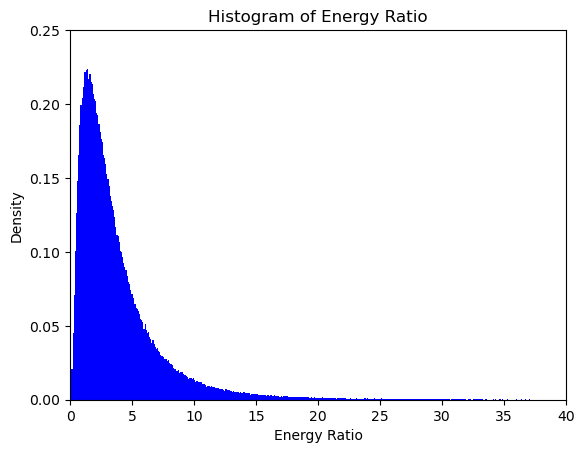

In [158]:
import matplotlib.pyplot as plt
plt.hist(merged["energy_Ratio"], color="blue", density=True, bins=1000)
plt.xlim(0, 40)
plt.ylim(0, 0.25)
plt.xlabel('Energy Ratio')
plt.ylabel('Density')
plt.title('Histogram of Energy Ratio')
plt.show()

# Merging the weights

In [160]:
years = list(range(89, 96))
theirdf = pd.DataFrame(columns=["HHID","Year","Weight"])
for year in years:
    df3 = pyreadr.read_r(fr"C:\Users\Mahsa\Desktop\geo\SamplingWeights\HHWeights{year}.rda")
    df3 = list(df3.values())[0]
    df3["HHID"] = df3["HHID"].astype("str")
    mask = df3["HHID"].str.contains(r"\.")
    df3.loc[mask, 'HHID'] = df3.loc[mask, "HHID"].str.split(".").str[0]
    theirdf= pd.concat([theirdf,df3], axis= 0)
print(theirdf.shape)

(267979, 3)


In [161]:
merged[merged["year"]< 96].shape

(278408, 104)

In [163]:
theirdf.rename(columns={
    "Year": "year"
}, inplace=True)
merged = pd.merge(merged, theirdf, on = ["HHID", "year"], how= "left")
merged.loc[merged["weight"].isna(), "weight"] = merged["Weight"]

In [ ]:
merged.drop(columns= ["Weight"], inplace = True)

In [167]:
merged.shape

(545037, 104)

In [169]:
years = list(range(89, 99))+ [99] + list(range(1400, 1403))
for year in years:
    pop = merged.loc[merged["year"]==year]["weight"].sum()
    print(f"The population in {year} is {pop.round(0)}")

The population in 89 is 20145831.0
The population in 90 is 21159033.0
The population in 91 is 21757336.0
The population in 92 is 22637024.0
The population in 93 is 23376013.0
The population in 94 is 24115010.0
The population in 95 is 24854004.0
The population in 96 is 24864484.0
The population in 97 is 25164306.0
The population in 98 is 25685577.0
The population in 99 is 26189113.0
The population in 1400 is 26693614.0
The population in 1401 is 27194087.0
The population in 1402 is 27697668.0


In [170]:
merged.to_pickle("merged")

In [2]:
merged = pd.read_pickle("merged")

In [3]:
merged.columns


Index(['HHID', 'month', 'household_type', 'region', 'quarter', 'weight',
       'county_code', 'province_code', 'province', 'HHsize',
       ...
       'MedicalExtraExp', 'TransportationExtraExp', 'CommunicationExtraExp',
       'AmusementExtraExp', 'EducationExp', 'OtherExtraExp', 'year',
       'all_expenditure', 'all_energy_EXP', 'energy_Ratio'],
      dtype='object', length=104)